# Color space transformations

It is important to note that sometimes an imaging problem can be greatly simplified by using a different color space

In [1]:
import numpy as np
import pandas as pd
from skimage import io, color

In [2]:
# %load functions.py
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

# A function to plot a matrix
def plot_image(data, colorspace='binary'):
    fig = plt.figure(figsize=(10,10)) 
    ax = fig.add_subplot(111)
    ax.imshow(data, cmap=colorspace)
    
    
def normalize_array(array):
    array_min = array.min(axis=(0, 1), keepdims=True)
    array_max = array.max(axis=(0, 1), keepdims=True)
    normalized_array = (array - array_min)/(array_max - array_min)
    
    return normalized_array

def normalize_with_preset(array, max_value, min_value):
    normalized_array = (array - min_value)/(max_value - min_value)
    
    return normalized_array


def recreate_image(labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    image = np.zeros((w, h))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = labels[label_idx]
            label_idx += 1
    return image

def overlay_images(image1, image2, colorspace1='binary', colorspace2='magma', transparency=0.5):
    plt.imshow(image1, cmap=colorspace1, interpolation='nearest')
    plt.imshow(image2, cmap=colorspace2, alpha=transparency, interpolation='bilinear')
    plt.show()
    
def flatten_normalize_neighbors(training_set, global_max=233, global_min=69):
    flattened_neighbors = []
    neighbors = training_set['neighbors']

    for i in range(len(neighbors)):
        numpy_array = np.array(neighbors[i]).reshape(-1, 1)
        normalized_neighbors = normalize_with_preset(numpy_array, global_max, global_min)
        flattened_neighbors.append(normalized_neighbors)
    
    return np.array(flattened_neighbors).reshape((len(flattened_neighbors), -1))

In [3]:
indios_a = np.load('./data_preprocessing/numpy_data/indios_a.npy')
indios_b = np.load('./data_preprocessing/numpy_data/indios_b.npy')

### Convert from RGB to HSV

Let's convert to another color space so that we can see colors better

In [10]:
indios_a_hsv = color.rgb2hsv(indios_a)
indios_b_hsv = color.rgb2hsv(indios_b)
# indios_b_hsv_subset = color.rgb2hsv(rgb)

ValueError: the input array must be have a shape == (.., ..,[ ..,] 3)), got (10000, 6000)

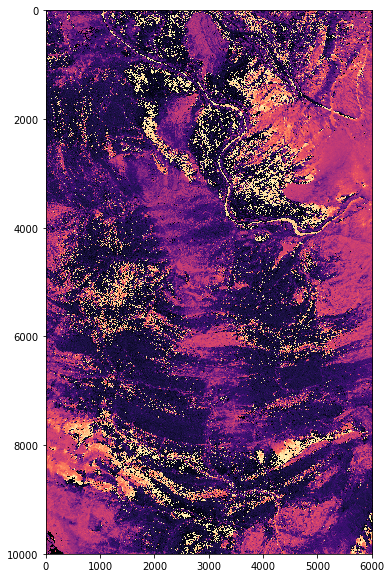

In [6]:
plot_image(indios_b_hsv[:, :, 0], colorspace='magma')

# Save the colorspace data

In [7]:
np.save('./data_preprocessing/numpy_data/indios_b_hsv.npy', indios_b_hsv)
# np.save('./data_preprocessing/numpy_data/indios_b/indios_b_hsv.npy', indios_b_hsv)
# Save the subset

In [9]:
import scipy.misc
scipy.misc.imsave('./data_preprocessing/numpy_data/indios_b_hsv.npy.jpg', indios_b_hsv[:, :, 0])